In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas


zillow_file = os.path.join("AD_Resources", "AD_zillow.csv")
zillow_df = pd.read_csv(zillow_file, low_memory=False, encoding="Latin-1")



# To view the headers, you can use the columns attribute of the DataFrame
headers = zillow_df.columns



print(headers)


Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'City', 'Metro', 'CountyName', '2000-01-31',
       ...
       '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31', '2023-01-31',
       '2023-02-28', '2023-03-31', '2023-04-30', '2023-05-31', '2023-06-30'],
      dtype='object', length=291)


In [9]:
columns_to_keep = ['RegionName', 'State', 'City','CountyName', 
                   '2022-01-31', '2022-02-28', '2022-03-31','2022-04-30', '2022-05-31', '2022-06-30',
                   '2022-07-31', '2022-08-31', '2022-09-30','2022-10-31', '2022-11-30', '2022-12-31',
                   
                   '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30',
                   '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31',
                   
                   '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30',
                   '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31']

# Create a new DataFrame with the specified columns
zillow_df_selected = zillow_df[columns_to_keep]

zillow_df_selected


,RegionName,State,City,CountyName,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,...,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31
0,8701,NJ,Lakewood,Ocean County,449590.267897,460790.185143,473920.179413,485765.325284,496446.807959,506343.946927,...,336935.323031,337083.985753,336802.896897,337164.894904,336827.812935,336640.482402,336014.069828,336314.864581,337719.732724,339047.368935
1,77494,TX,Katy,Fort Bend County,448659.592146,456661.820692,465422.589675,473313.790255,480524.947077,486784.942865,...,353667.777304,354280.976588,354562.964355,354517.938946,354180.645431,353690.349489,353629.361969,353826.955678,354493.420257,355392.662157
2,77449,TX,Katy,Harris County,257271.586950,262666.805136,268404.829432,273377.359997,277611.821634,281484.264383,...,202540.700984,203031.349746,203491.411025,203911.608297,204339.343549,204824.662284,205304.213425,205892.414221,206711.989282,207800.119345
3,11368,NY,New York,Queens County,440641.278723,438698.651924,437750.820761,438524.846905,438650.239367,439390.834516,...,386466.996148,392082.190601,396660.464727,400527.869852,404591.661734,408022.572894,410146.417047,410835.166816,412502.921913,414656.965956
4,78660,TX,Pflugerville,Travis County,430952.416012,438733.979106,448143.022846,457839.552819,466048.884485,470946.567925,...,301446.876606,301583.200340,302066.928894,302817.659752,303662.527857,304429.147766,305218.466163,306503.507267,308056.239574,310052.163633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27001,77451,TX,East Bernard,Fort Bend County,147709.840874,152464.166742,157334.612632,160947.977276,163038.619110,164536.579298,...,102872.692475,103197.634599,104547.517345,105988.603848,107057.230588,107330.007869,107261.471438,107398.696779,107727.050034,108454.708084
27002,52163,IA,Protivin,Howard County,NaN,98709.413283,99151.945983,99776.589641,101126.867462,102703.476524,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27003,26576,WV,Farmington,Marion County,85295.898884,86764.214957,88458.735025,89770.574956,90806.100578,92215.047571,...,66428.377093,66417.398993,66766.337104,67205.234882,67534.304360,67428.393001,67017.222366,66566.134188,66209.181227,66141.720024
27004,16245,PA,Oak Ridge,Armstrong County,62484.218086,66302.053267,71657.627543,75547.585673,77830.282841,79223.380554,...,41668.358785,42300.011356,42923.332610,43689.750360,44449.115364,44916.450938,44884.158264,44889.759722,44981.648841,45072.718192


In [11]:
purchase_columns19 = ['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30',
                   '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31']

columns_2019 = ['RegionName', 'State', 'City','CountyName', '2019-01-31', '2019-02-28', '2019-03-31', 
                '2019-04-30', '2019-05-31', '2019-06-30','2019-07-31', '2019-08-31',
                '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31']

zillow_df_2019 = zillow_df_selected[columns_2019]


# Convert columns for the year 2022 to integer data type and removing any NAN
zillow_df_2019.dropna(inplace=True)
zillow_df_2019[purchase_columns20] = zillow_df_2019[columns_2019].astype(int)


#filtering out to show only Austin, TX
zillow_df_2019 = zillow_df_2019[zillow_df_2019['City'] == 'Austin']
zillow_df_2019 = zillow_df_2019[zillow_df_2019['State'] == 'TX']
zillow_df_2019 = zillow_df_2020.rename(columns={'RegionName': 'Zip Code'})

zillow_df_2019

/var/folders/mp/2rmhnljs2pndsyqr32kfmxcr0000gn/T/ipykernel_41253/3320278327.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zillow_df_2019.dropna(inplace=True)


ValueError: invalid literal for int() with base 10: 'NJ'

In [12]:
purchase_columns21 = ['2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30',
                   '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31']

columns_2021 = ['RegionName', 'State', 'City','CountyName', '2021-01-31', '2021-02-28', '2021-03-31', 
                '2021-04-30', '2021-05-31', '2021-06-30','2021-07-31', '2021-08-31',
                '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31']

zillow_df_2021 = zillow_df_selected[columns_2021]


# Convert columns for the year 2022 to integer data type and removing any NAN
zillow_df_2021.dropna(inplace=True)
zillow_df_2021[purchase_columns21] = zillow_df_2021[purchase_columns21].astype(int)


#filtering out to show only Austin, TX
zillow_df_2021 = zillow_df_2021[zillow_df_2021['City'] == 'Austin']
zillow_df_2021 = zillow_df_2021[zillow_df_2021['State'] == 'TX']
zillow_df_2021 = zillow_df_2021.rename(columns={'RegionName': 'Zip Code'})
zillow_df_2021.rename(columns={'2021-01-31': 'January'}, inplace=True)
zillow_df_2021.rename(columns={'2021-02-28': 'February'}, inplace=True)
zillow_df_2021.rename(columns={'2021-03-31': 'March'}, inplace=True)
zillow_df_2021.rename(columns={'2021-04-30': 'April'}, inplace=True)
zillow_df_2021.rename(columns={'2021-05-31': 'May'}, inplace=True)
zillow_df_2021.rename(columns={'2021-06-30': 'June'}, inplace=True)
zillow_df_2021.rename(columns={'2021-07-31': 'July'}, inplace=True)
zillow_df_2021.rename(columns={'2021-08-31': 'August'}, inplace=True)
zillow_df_2021.rename(columns={'2021-09-30': 'September'}, inplace=True)
zillow_df_2021.rename(columns={'2021-10-31': 'October'}, inplace=True)
zillow_df_2021.rename(columns={'2021-11-30': 'November'}, inplace=True)
zillow_df_2021.rename(columns={'2021-12-31': 'December'}, inplace=True)

                     
zillow_df_2021

/var/folders/mp/2rmhnljs2pndsyqr32kfmxcr0000gn/T/ipykernel_41253/1175835136.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zillow_df_2021.dropna(inplace=True)
/var/folders/mp/2rmhnljs2pndsyqr32kfmxcr0000gn/T/ipykernel_41253/1175835136.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zillow_df_2021[purchase_columns21] = zillow_df_2021[purchase_columns21].astype(int)


,Zip Code,State,City,CountyName,January,February,March,April,May,June,July,August,September,October,November,December
395,78745,TX,Austin,Travis County,406153,415632,425760,436974,449179,460401,468171,471199,471266,471492,473715,478406
697,78753,TX,Austin,Travis County,340751,347670,354900,362616,371571,380946,387906,391016,390361,388927,389212,391895
894,78704,TX,Austin,Travis County,660169,675286,692251,712891,737036,762163,783375,796586,804557,811869,823049,837168
897,78758,TX,Austin,Travis County,394824,402351,410069,418805,428578,438684,445661,448346,446860,444705,444094,446324
1033,78748,TX,Austin,Travis County,396187,404490,413229,423035,433823,444491,452133,455405,455465,454867,455814,459004
1042,78744,TX,Austin,Travis County,301645,309773,318983,329579,341563,354055,363847,369673,371985,373614,376056,380218
1249,78741,TX,Austin,Travis County,361883,369379,377883,388943,402510,416549,427791,434270,437653,440324,444504,449955
1332,78759,TX,Austin,Travis County,633281,645984,659445,674460,691192,707073,716257,717360,712965,709537,710461,716625
2483,78723,TX,Austin,Travis County,471815,481922,493567,507250,521809,536496,546710,550673,549178,548407,550151,554802
2565,78717,TX,Austin,Williamson County,487944,498071,510292,525071,542942,560271,572669,578424,578997,579230,581714,588054


In [13]:
purchase_columns22 = ['2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31', '2022-06-30',
                   '2022-07-31', '2022-08-31', '2022-09-30','2022-10-31', '2022-11-30', '2022-12-31']

columns_2022 = ['RegionName', 'State', 'City','CountyName', '2022-01-31', '2022-02-28', '2022-03-31', 
                '2022-04-30', '2022-05-31', '2022-06-30','2022-07-31', '2022-08-31',
                '2022-09-30','2022-10-31', '2022-11-30', '2022-12-31']

zillow_df_2022 = zillow_df_selected[columns_2022]


# Convert columns for the year 2022 to integer data type and removing any NAN
zillow_df_2022.dropna(inplace=True)
zillow_df_2022[purchase_columns22] = zillow_df_2022[purchase_columns22].astype(int)


#filtering out to show only Austin, TX
zillow_df_2022 = zillow_df_2022[zillow_df_2022['City'] == 'Austin']
zillow_df_2022 = zillow_df_2022[zillow_df_2022['State'] == 'TX']
zillow_df_2022 = zillow_df_2022.rename(columns={'RegionName': 'Zip Code'})
zillow_df_2022.rename(columns={'2022-01-31': 'January'}, inplace=True)
zillow_df_2022.rename(columns={'2022-02-28': 'February'}, inplace=True)
zillow_df_2022.rename(columns={'2022-03-31': 'March'}, inplace=True)
zillow_df_2022.rename(columns={'2022-04-30': 'April'}, inplace=True)
zillow_df_2022.rename(columns={'2022-05-31': 'May'}, inplace=True)
zillow_df_2022.rename(columns={'2022-06-30': 'June'}, inplace=True)
zillow_df_2022.rename(columns={'2022-07-31': 'July'}, inplace=True)
zillow_df_2022.rename(columns={'2022-08-31': 'August'}, inplace=True)
zillow_df_2022.rename(columns={'2022-09-30': 'September'}, inplace=True)
zillow_df_2022.rename(columns={'2022-10-31': 'October'}, inplace=True)
zillow_df_2022.rename(columns={'2022-11-30': 'November'}, inplace=True)
zillow_df_2022.rename(columns={'2022-12-31': 'December'}, inplace=True)
zillow_df_2022.reset_index(drop=True, inplace=True)
zillow_df_2022.set_index('Zip Code', inplace=True)
zillow_df_2022.sort_index(ascending=False, inplace=True)

zillow_df_2022

/var/folders/mp/2rmhnljs2pndsyqr32kfmxcr0000gn/T/ipykernel_41253/2212923111.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zillow_df_2022.dropna(inplace=True)
/var/folders/mp/2rmhnljs2pndsyqr32kfmxcr0000gn/T/ipykernel_41253/2212923111.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zillow_df_2022[purchase_columns22] = zillow_df_2022[purchase_columns22].astype(int)


,State,City,CountyName,January,February,March,April,May,June,July,August,September,October,November,December
Zip Code,,,,,,,,,,,,,,,
78759,TX,Austin,Travis County,730037,747934,770634,791404,807579,814801,813088,805605,795705,786904,779440,771554
78758,TX,Austin,Travis County,452529,460940,471178,480161,488233,492558,492989,489374,484007,478418,472996,466683
78757,TX,Austin,Travis County,681141,696930,717366,735476,750541,758177,757454,749943,738525,727441,717939,708394
78756,TX,Austin,Travis County,785235,805689,833859,859901,879960,889075,888853,881357,868295,855491,845928,838191
78754,TX,Austin,Travis County,413508,420311,428541,436597,443798,448500,449314,446640,441343,435380,429061,422682
78753,TX,Austin,Travis County,397929,405655,414923,423535,431111,435937,436988,434616,430571,426763,422367,416695
78752,TX,Austin,Travis County,477522,488619,503293,516697,527797,532939,531264,523899,514317,506060,499131,491951
78751,TX,Austin,Travis County,668717,684603,706123,726090,742556,750943,751423,745476,735918,727206,721028,714789
78750,TX,Austin,Travis County,638661,652775,670178,685614,697695,703659,702920,697399,689449,682342,676319,670131


In [180]:
purchase_columns = ["January","February","March","April","May",
                    "June","July","August","September","October",
                    "November","December"]



# Extract the purchase columns for plotting
purchase_data = zillow_df_2022[purchase_columns]

# Transpose the 'purchase_data' DataFrame
purchase_data_transposed = purchase_data.T


purchase_data_transposed


Zip Code,78759,78758,78757,78756,78754,78753,78752,78751,78750,78749,...,78723,78722,78721,78719,78717,78705,78704,78703,78702,78701
January,730037,452529,681141,785235,413508,397929,477522,668717,638661,603964,...,564478,636814,493569,389628,598850,478139,854837,1351246,642430,755370
February,747934,460940,696930,805689,420311,405655,488619,684603,652775,613877,...,577861,649586,505532,402110,612332,482758,876333,1394525,657839,777285
March,770634,471178,717366,833859,428541,414923,503293,706123,670178,625355,...,595550,668975,520542,415905,627687,487724,906761,1453043,679083,804601
April,791404,480161,735476,859901,436597,423535,516697,726090,685614,636119,...,612133,689391,534701,428218,642145,492185,939964,1510697,701289,829371
May,807579,488233,750541,879960,443798,431111,527797,742556,697695,644471,...,625928,708330,546758,435740,653488,496387,969211,1557564,722043,853693
June,814801,492558,758177,889075,448500,435937,532939,750943,703659,648766,...,632918,719631,554105,438667,659224,498825,986806,1584175,735479,872685
July,813088,492989,757454,888853,449314,436988,531264,751423,702920,647437,...,631948,721898,555288,435590,658096,498241,991839,1589036,739068,885991
August,805605,489374,749943,881357,446640,434616,523899,745476,697399,642850,...,625021,716863,551223,429877,652733,493855,986184,1577377,733036,887651
September,795705,484007,738525,868295,441343,430571,514317,735918,689449,636910,...,615466,708443,544590,423077,645206,487402,971838,1554296,721796,882278
October,786904,478418,727441,855491,435380,426763,506060,727206,682342,632447,...,607026,699368,537827,417081,638826,481695,958230,1532773,710562,875156


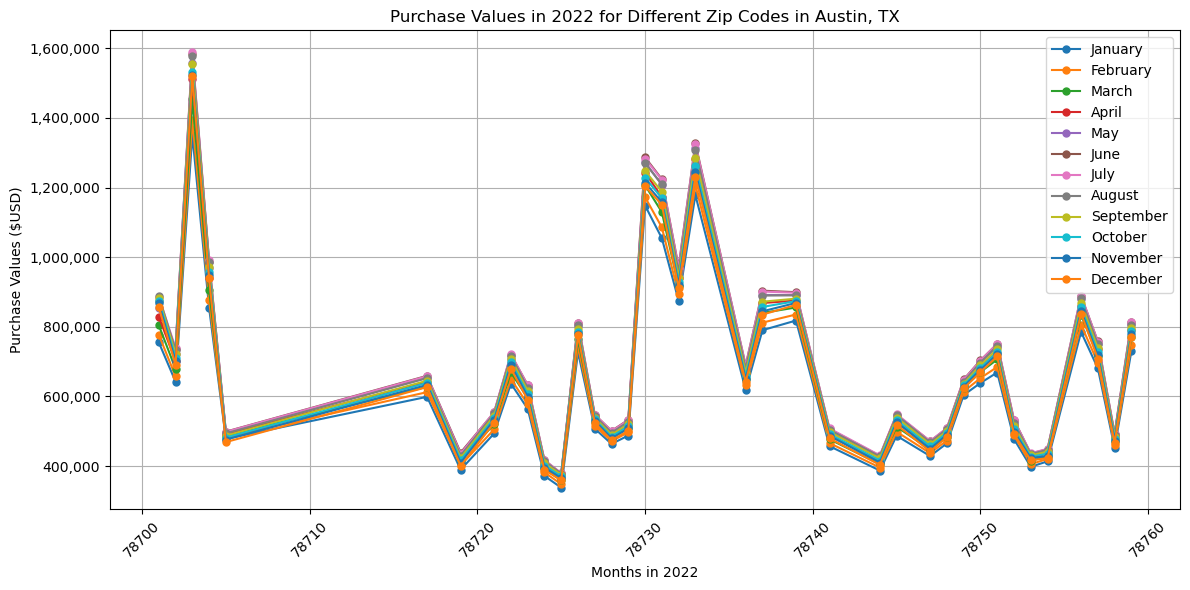

In [190]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Extract the dates (months) as x_axis
x_axis = purchase_data_transposed.columns

# Transpose the 'purchase_data' DataFrame to have zip codes as rows and months as columns
purchase_data_transposed = purchase_data.T

# Plotting
plt.figure(figsize=(12, 6))
for index, row in purchase_data_transposed.iterrows():
    plt.plot(x_axis, row, marker='o', markersize=5, label=index)

# Customize the plot
plt.xlabel('Months in 2022')
plt.ylabel('Purchase Values ($USD)')
plt.title('Purchase Values in 2022 for Different Zip Codes in Austin, TX')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='best')

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
#plt.ticklabel_format(style='plain', axis='y')

# Display the plot
plt.tight_layout()
plt.show()

Int64Index([  395,   697,   894,   897,  1033,  1042,  1249,  1332,  2483,
             2565,  2750,  3596,  3693,  3819,  3886,  4251,  4529,  4543,
             4632,  4655,  4780,  4851,  5605,  5638,  5858,  6341,  6589,
             7552,  8391,  8652,  8920,  9065,  9443,  9538,  9594, 11525,
            11764, 15411],
           dtype='int64')